In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import BaggingClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification

In [14]:
x, y = make_classification(
    n_samples=100,       # Fixed number of samples
    n_features=2,        # Fixed number of features
    n_classes=3,         # Number of classes
    n_informative=2,     # All features are informative
    n_redundant=0,       # No redundant features
    n_clusters_per_class=1,  # Adjusted to satisfy the condition
    flip_y=0.03,         # Add slight label noise
    class_sep=1.5,       # Enhance separability
    random_state=42
)

In [15]:
df = pd.DataFrame(x,columns=['feature1','feature2'])
df['target'] = y

In [16]:
df.head()

,feature1,feature2,target
0,-1.426315,-1.449498,2
1,-1.176214,1.912767,0
2,-1.810385,1.056563,0
3,-1.000234,-1.251066,2
4,-1.135331,-1.306694,0


In [17]:
df_train = df.iloc[:60,:].sample(20)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [18]:
x_test = df_val.drop(columns=['target'])
y_test = df_val['target']

Evaluate

In [19]:
def evaluate(clf,x,y):
    clf.fit(x,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(x.values,y.values,clf=clf)
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test,y_pred))

Bagging

In [20]:
df_bag = df_train.sample(15,replace=True)
x = df_bag.drop(columns=['target'])
y = df_bag['target']
df_bag

,feature1,feature2,target
53,-1.919527,-1.713365,2
24,1.321807,1.239028,1
26,-1.987396,0.960109,0
0,-1.426315,-1.449498,2
1,-1.176214,1.912767,0
24,1.321807,1.239028,1
36,-2.021659,1.033585,0
20,0.471389,0.417608,1
1,-1.176214,1.912767,0
38,-1.174991,-1.352226,2


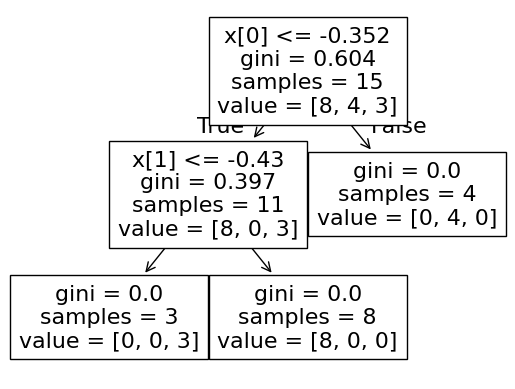

0.8


c:\Users\Khushi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


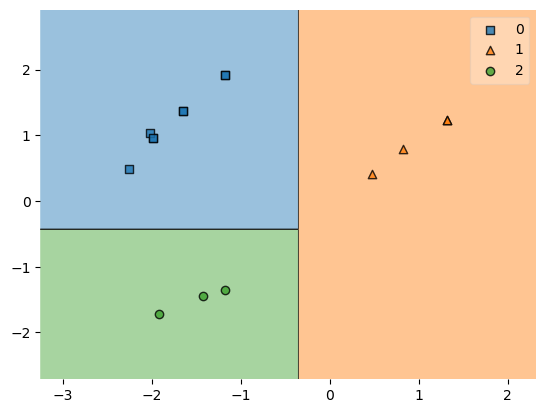

In [21]:
dt1 = DecisionTreeClassifier()
evaluate(dt1,x,y)